In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
yt_df = pd.read_csv("USvideosv.csv")
yt_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
corr_likes = yt_df['views'].corr(yt_df['likes'])
corr_dislikes = yt_df['views'].corr(yt_df['dislikes'])
corr_table = yt_df[['views', 'likes', 'dislikes', 'comment_count']].corr()
corr_table


,views,likes,dislikes,comment_count
views,1.000000,0.849177,0.472213,0.617621
likes,0.849177,1.000000,0.447186,0.803057
dislikes,0.472213,0.447186,1.000000,0.700184
comment_count,0.617621,0.803057,0.700184,1.000000


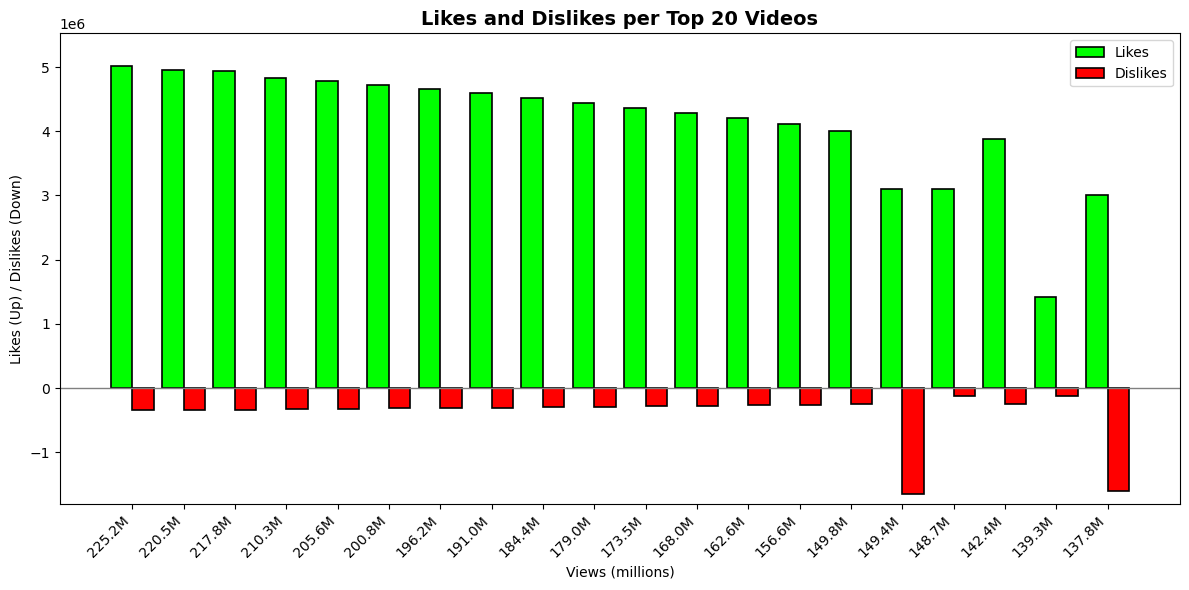

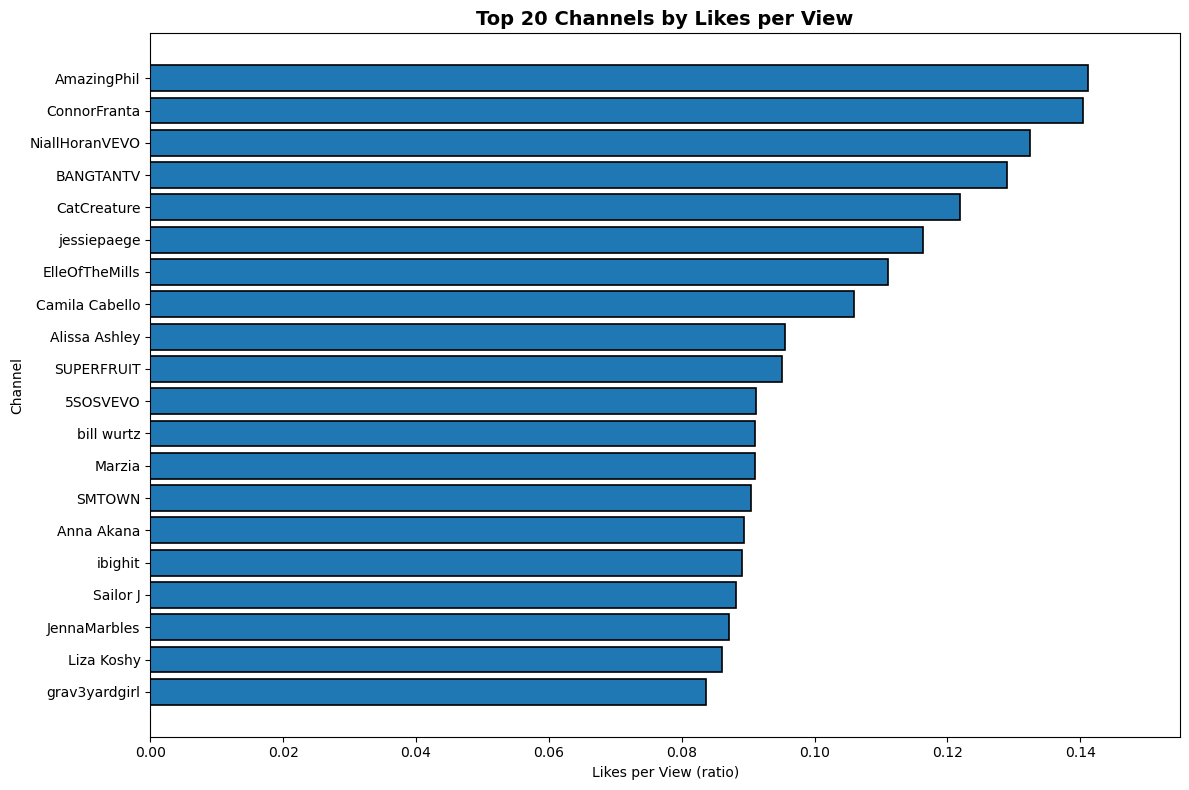

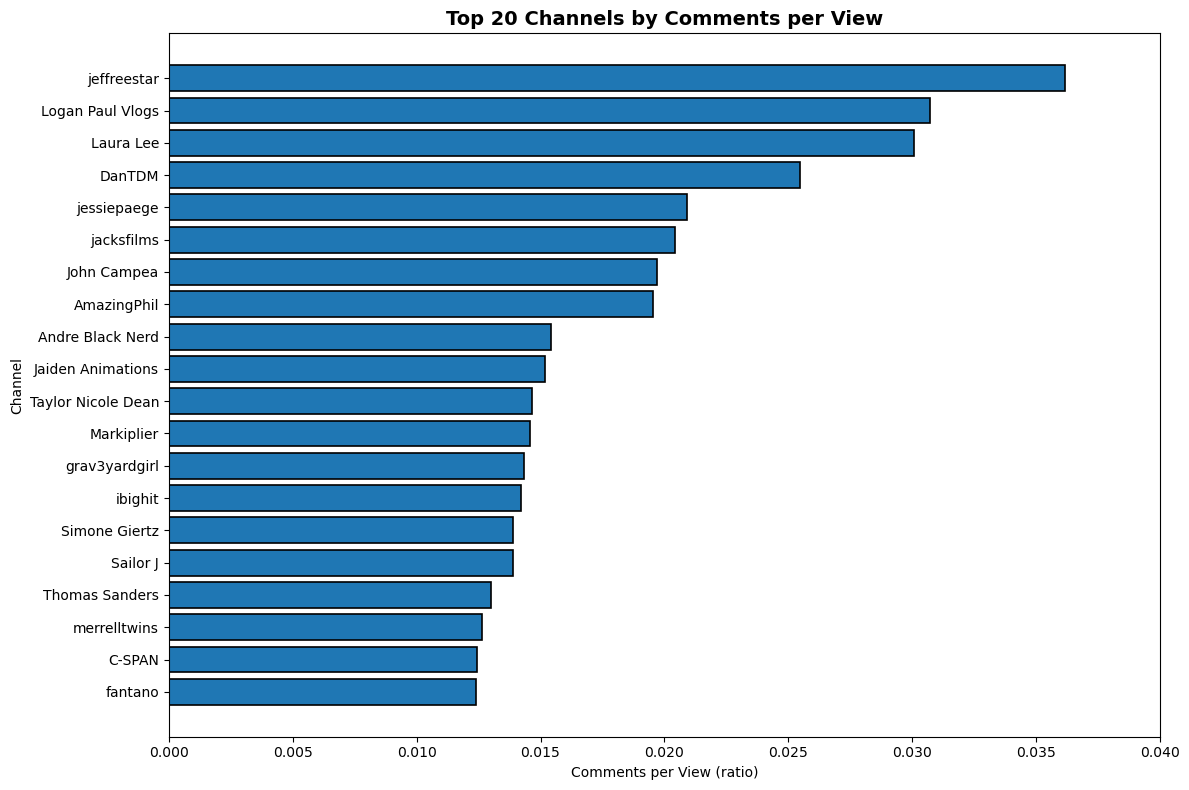

In [7]:
import matplotlib.pyplot as plt
import numpy as np


yt_top20 = yt_df.sort_values("views", ascending=False).head(20).reset_index(drop=True)

x = np.arange(len(yt_top20))
w = 0.42

plt.figure(figsize=(12, 6))


plt.bar(
    x - w/2,
    yt_top20["likes"].to_numpy(),
    width=w,
    color="lime",
    edgecolor="black",
    linewidth=1.2,
    label="Likes"
)


plt.bar(
    x + w/2,
    -yt_top20["dislikes"].to_numpy(),
    width=w,
    color="red",
    edgecolor="black",
    linewidth=1.2,
    label="Dislikes"
)

plt.axhline(0, color="gray", linewidth=1)
plt.ylim(-yt_top20["dislikes"].max() * 1.1, yt_top20["likes"].max() * 1.1)


xlabels = (yt_top20["views"] / 1_000_000).round(1).astype(str) + "M"
plt.xticks(x, xlabels.tolist(), rotation=45, ha="right")

plt.title("Likes and Dislikes per Top 20 Videos", fontsize=14, fontweight="bold")
plt.xlabel("Views (millions)")
plt.ylabel("Likes (Up) / Dislikes (Down)")
plt.legend()
plt.tight_layout()
plt.show()

channel_df = (
    yt_df.groupby("channel_title")
         .agg(
             videos=("video_id", "nunique"),
             total_views=("views", "sum"),
             total_likes=("likes", "sum"),
             total_comments=("comment_count", "sum"),
         )
         .reset_index()
)


channel_df["total_views"] = channel_df["total_views"].clip(lower=1)
channel_df["total_likes"] = channel_df["total_likes"].fillna(0)
channel_df["total_comments"] = channel_df["total_comments"].fillna(0)


channel_df["like_rate"] = (channel_df["total_likes"] / channel_df["total_views"]).clip(upper=0.2)
channel_df["comment_rate"] = (channel_df["total_comments"] / channel_df["total_views"]).clip(upper=0.2)

filtered = channel_df[
    (channel_df["videos"] >= 3) &
    (channel_df["total_views"] >= 1_000_000)
].copy()



# 2) Top 20 Channels by Likes per View

top_like = filtered.sort_values("like_rate", ascending=False).head(20)

plt.figure(figsize=(12, 8))
plt.barh(
    top_like["channel_title"],
    top_like["like_rate"],
    color="#1f77b4",
    edgecolor="black",
    linewidth=1.2
)
plt.gca().invert_yaxis()

xmax_like = float(top_like["like_rate"].max() * 1.1)
plt.xlim(0, round(xmax_like, 3))

plt.title("Top 20 Channels by Likes per View", fontsize=14, fontweight="bold")
plt.xlabel("Likes per View (ratio)")
plt.ylabel("Channel")
plt.tight_layout()
plt.show()



# 3) Top 20 Channels by Comments per View

top_comment = filtered.sort_values("comment_rate", ascending=False).head(20)

plt.figure(figsize=(12, 8))
plt.barh(
    top_comment["channel_title"],
    top_comment["comment_rate"],
    color="#1f77b4",
    edgecolor="black",
    linewidth=1.2
)
plt.gca().invert_yaxis()

xmax_comment = float(top_comment["comment_rate"].max() * 1.1)
plt.xlim(0, round(xmax_comment, 3))

plt.title("Top 20 Channels by Comments per View", fontsize=14, fontweight="bold")
plt.xlabel("Comments per View (ratio)")
plt.ylabel("Channel")
plt.tight_layout()
plt.show()
